<a href="https://colab.research.google.com/github/YanaMinyaylo/NS/blob/main/NN_LSTM_17_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy import signal
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
dir1 = '/content/NS/data/NN_data/NN_data_Arseniy_2.csv'
dir2 = '/content/NS/data/NN_data/NN_data_Arseniy_3.csv'
dir3 = '/content/NS/data/NN_data/NN_data_Artur_2.csv'
dir4 = '/content/NS/data/NN_data/NN_data_Yana_2.csv'
dir5 = '/content/NS/data/NN_data/NN_data_Elya_2.csv'
dir6 = '/content/NS/data/NN_data/NN_data_Maxim_2.csv'
dir7 = '/content/NS/data/NN_data/NN_data_Maxim_3.csv'

In [ ]:
df1 = pd.read_csv(dir1)
df2 = pd.read_csv(dir2)
df3 = pd.read_csv(dir3)
df4 = pd.read_csv(dir4)
df5 = pd.read_csv(dir5)
df6 = pd.read_csv(dir6)
df7 = pd.read_csv(dir7)

In [ ]:
df12 = pd.concat([df1, df2], axis = 0)
df67 = pd.concat([df6, df7], axis = 0)

In [ ]:
x12 = np.array(df12['gx']).reshape(-1, 1)
y12 = np.array(df12['Hor_eye']).reshape(-1, 1)

x3 = np.array(df3['gx']).reshape(-1, 1)
y3 = np.array(df3['Hor_eye']).reshape(-1, 1)

x4 = np.array(df4['gx']).reshape(-1, 1)
y4 = np.array(df4['Hor_eye']).reshape(-1, 1)

x5 = np.array(df5['gx']).reshape(-1, 1)
y5 = np.array(df5['Hor_eye']).reshape(-1, 1)

x67 = np.array(df67['gx']).reshape(-1, 1)
y67 = np.array(df67['Hor_eye']).reshape(-1, 1)

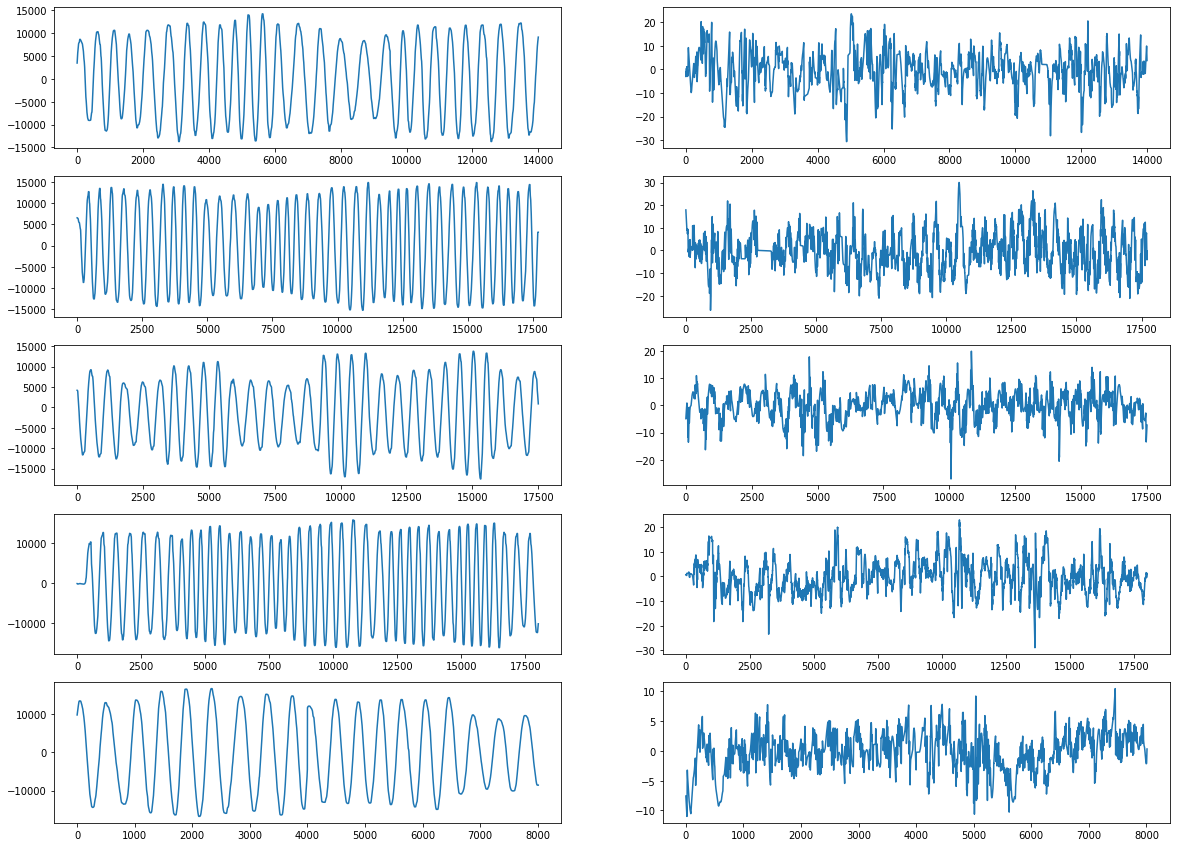

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows = 5, figsize=(20, 15))
n1 = 0
n2 = -1
ax[0][0].plot(x12[n1:n2], '-')
ax[0][1].plot(y12[n1:n2], '-')

ax[1][0].plot(x3[n1:n2], '-')
ax[1][1].plot(y3[n1:n2], '-')

ax[2][0].plot(x4[n1:n2], '-')
ax[2][1].plot(y4[n1:n2], '-')

ax[3][0].plot(x5[n1:n2], '-')
ax[3][1].plot(y5[n1:n2], '-')

ax[4][0].plot(x67[n1:n2], '-')
ax[4][1].plot(y67[n1:n2], '-')

plt.show()

In [ ]:
# df12 = pd.concat([df1, df2], axis = 0)
# df34 = pd.concat([df3, df4], axis = 0)
# df67 = pd.concat([df6, df7], axis = 0)

# df14 = pd.concat([df12, df34], axis = 0)

# df_train = pd.concat([df14, df67], axis = 0)

# df_test =df5

In [ ]:
# x_train = np.array(df_train['gx']).reshape(-1, 1)
# y_train = np.array(df_train['Hor_eye']).reshape(-1, 1)
# x_test = np.array(df_test['gx']).reshape(-1, 1)
# y_test = np.array(df_test['Hor_eye']).reshape(-1, 1)

In [ ]:
x_scaler = MinMaxScaler((-1,1))
y_scaler = MinMaxScaler((-1,1))

scaled_x12 = x_scaler.fit_transform(x12)
scaled_y12 = y_scaler.fit_transform(y12)

scaled_x3 = x_scaler.fit_transform(x3[4000:])
scaled_y3 = y_scaler.fit_transform(y3[4000:])

scaled_x4 = x_scaler.fit_transform(x4)
scaled_y4 = y_scaler.fit_transform(y4)

scaled_x5 = x_scaler.fit_transform(x5[500:])
scaled_y5 = y_scaler.fit_transform(y5[500:])



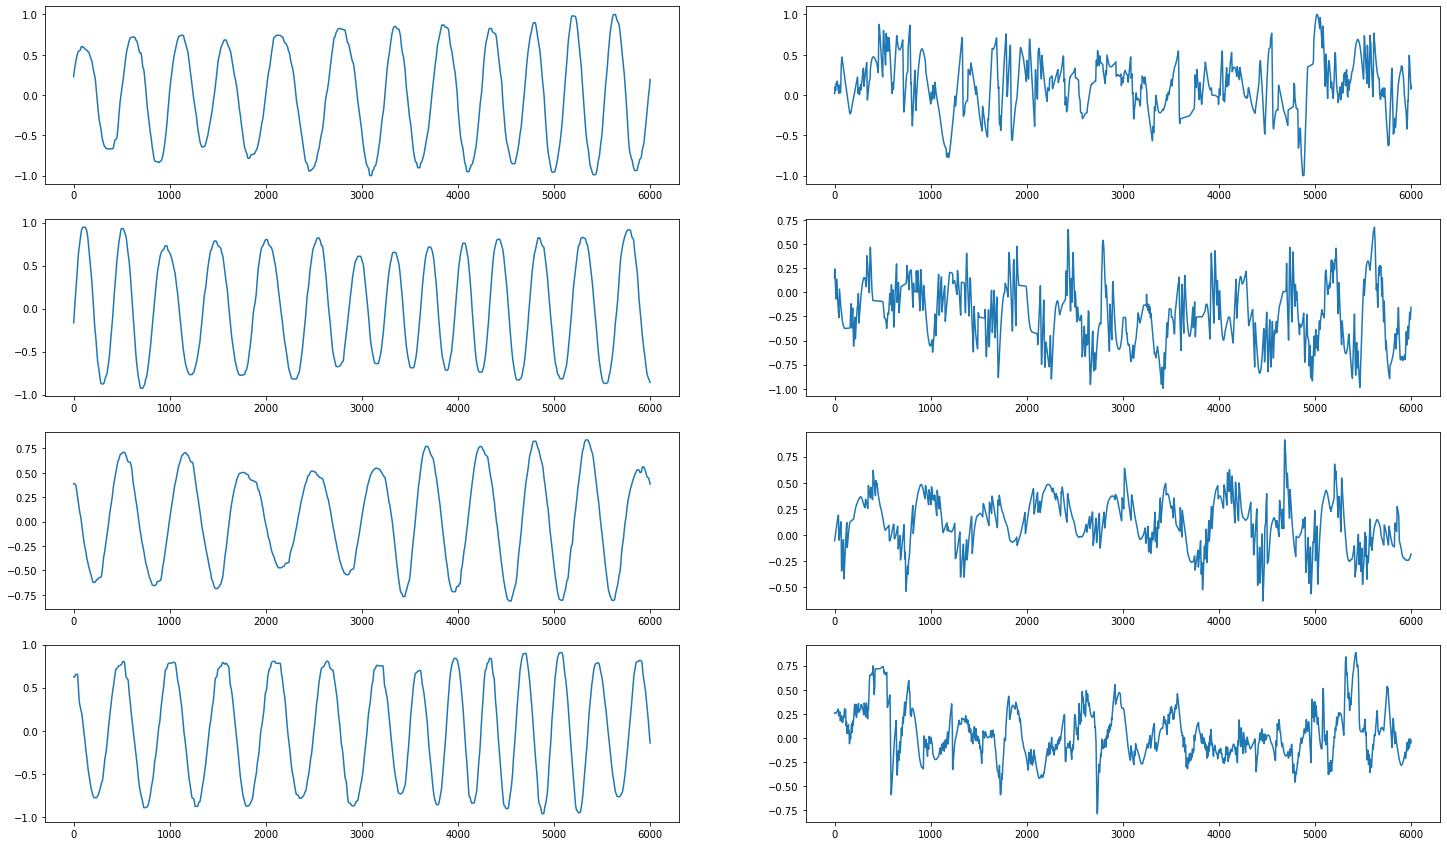

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows = 4, figsize=(25, 15))
n1 = 0
n2 = 6000
ax[0][0].plot(scaled_x12[n1:n2], '-')
ax[0][1].plot(scaled_y12[n1:n2], '-')

ax[1][0].plot(scaled_x3[n1:n2], '-')
ax[1][1].plot(scaled_y3[n1:n2], '-')

ax[2][0].plot(scaled_x4[n1:n2], '-')
ax[2][1].plot(scaled_y4[n1:n2], '-')

ax[3][0].plot(scaled_x5[n1:n2], '-')
ax[3][1].plot(scaled_y5[n1:n2], '-')

plt.show()

In [ ]:
x13 = np.concatenate((scaled_x12, scaled_x3), axis=0)
x_train = np.concatenate((x13, scaled_x4), axis=0)

y13 = np.concatenate((scaled_y12, scaled_y3), axis=0)
y_train = np.concatenate((y13, scaled_y4), axis=0)

# We will predict 100 values in the future
len_forecast = 1000

# Let's dividide our data on train and test samples
y_train2 = scaled_y5[:-len_forecast]
y_test = scaled_y5[-len_forecast:]

x_train2 = scaled_x5[:-len_forecast]
x_test = scaled_x5[-len_forecast:]

In [ ]:
def make_feature_set(x_, y_, size_n):

    features_set = []
    labels = []

    n = size_n
    k = 1

    for i in range(n, len(x_)):
        features_set.append(x_[i-n:i, 0])
        labels.append(y_[i-k:i, 0])

    features_set, labels = np.array(features_set), np.array(labels)
    features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
    labels = np.reshape(labels, (labels.shape[0], labels.shape[1], 1))

    print(features_set.shape, labels.shape)

    return features_set, labels

In [ ]:
size_n = 100
feature_train, label_train = make_feature_set(x_train, y_train, size_n)
feature_train2, label_train2 = make_feature_set(x_train2, y_train2, size_n)
feature_test, label_test = make_feature_set(x_test, y_test, size_n)

(45118, 100, 1) (45118, 1, 1)
(16411, 100, 1) (16411, 1, 1)
(900, 100, 1) (900, 1, 1)


In [ ]:
import tensorflow as tf
from keras.layers import Dropout

In [ ]:
linear = tf.keras.models.Sequential()
linear.add(tf.keras.Input(shape=(feature_train.shape[1],)))
linear.add(tf.keras.layers.Dense(40, activation='tanh'))
linear.add(Dropout(0.5))
linear.add(tf.keras.layers.Dense(20, activation='tanh'))
linear.add(Dropout(0.2))
linear.add(tf.keras.layers.Dense(1))
linear.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss = 'mse')

In [ ]:
linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                4040      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,881
Trainable params: 4,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
result_linear = linear.fit(feature_train, label_train, epochs = 50, batch_size = 16, validation_split=0.1, shuffle = False)

Epoch 1/50
2538/2538 [==============================] - 12s 4ms/step - loss: 0.6708 - val_loss: 0.0560
Epoch 2/50
2538/2538 [==============================] - 11s 4ms/step - loss: 0.3923 - val_loss: 0.0460
Epoch 3/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.2544 - val_loss: 0.0422
Epoch 4/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.1807 - val_loss: 0.0412
Epoch 5/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.1401 - val_loss: 0.0417
Epoch 6/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.1187 - val_loss: 0.0423
Epoch 7/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.1079 - val_loss: 0.0431
Epoch 8/50
2538/2538 [==============================] - 8s 3ms/step - loss: 0.1024 - val_loss: 0.0434
Epoch 9/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.0988 - val_loss: 0.0437
Epoch 10/50
2538/2538 [==============================] - 7s 3ms/step - loss: 0.0

In [ ]:
result_linear2 = linear.fit(feature_train2, label_train2, epochs = 20, batch_size = 16, validation_split=0.1, shuffle = False)

Epoch 1/20
924/924 [==============================] - 3s 3ms/step - loss: 0.0706 - val_loss: 0.0403
Epoch 2/20
924/924 [==============================] - 3s 3ms/step - loss: 0.0672 - val_loss: 0.0407
Epoch 3/20
924/924 [==============================] - 2s 3ms/step - loss: 0.0659 - val_loss: 0.0418
Epoch 4/20
924/924 [==============================] - 2s 3ms/step - loss: 0.0650 - val_loss: 0.0428
Epoch 5/20
924/924 [==============================] - 2s 3ms/step - loss: 0.0647 - val_loss: 0.0438
Epoch 6/20
924/924 [==============================] - 3s 3ms/step - loss: 0.0645 - val_loss: 0.0443
Epoch 7/20
924/924 [==============================] - 2s 3ms/step - loss: 0.0644 - val_loss: 0.0449
Epoch 8/20
924/924 [==============================] - 2s 3ms/step - loss: 0.0644 - val_loss: 0.0453
Epoch 9/20
924/924 [==============================] - 2s 3ms/step - loss: 0.0643 - val_loss: 0.0457
Epoch 10/20
924/924 [==============================] - 3s 3ms/step - loss: 0.0642 - val_loss: 0.0460

In [ ]:
predictions_linear = linear.predict(feature_test)

29/29 [==============================] - 0s 1ms/step


In [ ]:
# plt.figure(figsize=(12,9), facecolor='w')
# plt.plot(result_linear2.history['loss'], label='train linear')
# plt.plot(result_linear2.history['val_loss'], label='validation linear')
# plt.legend(fontsize=20)
# plt.xlabel('Epoch',  fontsize=20)
# plt.ylabel('loss',  fontsize=20)
# plt.show()

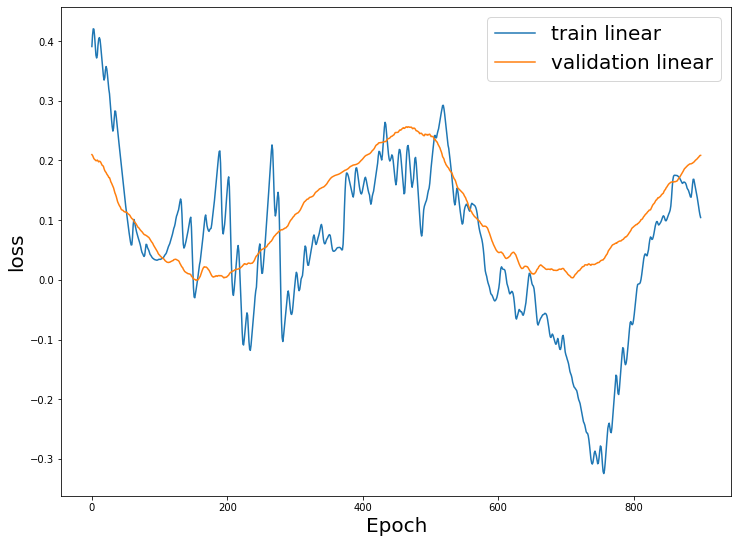

In [ ]:
plt.figure(figsize=(12,9), facecolor='w')
plt.plot(y_test[100:], label='train linear')
plt.plot(predictions_linear, label='validation linear')
# plt.plot(x_test[100:], label='train linear')
plt.legend(fontsize=20)
plt.xlabel('Epoch',  fontsize=20)
plt.ylabel('loss',  fontsize=20)
plt.show()

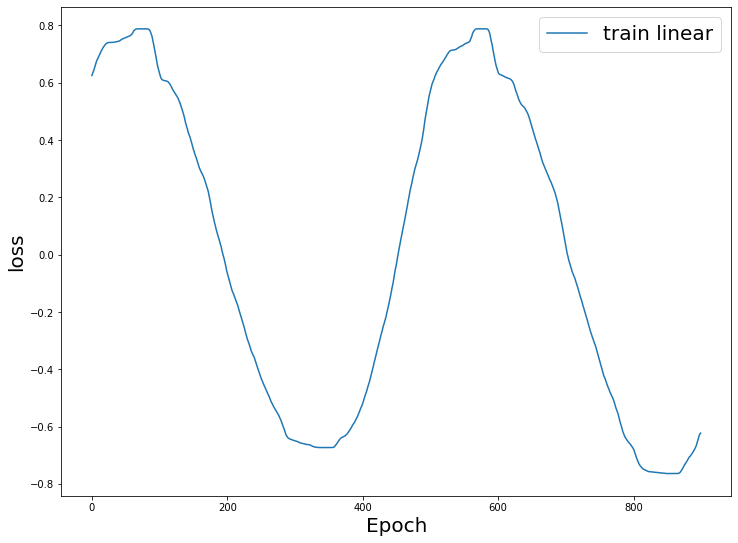

In [ ]:
plt.figure(figsize=(12,9), facecolor='w')
plt.plot(x_test[100:], label='train linear')
# plt.plot(predictions_linear, label='validation linear')
plt.legend(fontsize=20)
plt.xlabel('Epoch',  fontsize=20)
plt.ylabel('loss',  fontsize=20)
plt.show()

In [ ]:
u = 50
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units= u, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model_lstm.add(tf.keras.layers.Dropout(0.2))

model_lstm.add(tf.keras.layers.LSTM(units= u, return_sequences=True))
model_lstm.add(tf.keras.layers.Dropout(0.2))

model_lstm.add(tf.keras.layers.LSTM(units=u))
model_lstm.add(tf.keras.layers.Dropout(0.2))

model_lstm.add(tf.keras.layers.Dense(units = label_train.shape[1]))

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss = 'mean_squared_error')

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
result_lstm = model_lstm.fit(feature_train, label_train, epochs = 50, batch_size = 16, validation_split=0.1, shuffle=False)

Epoch 1/50
2538/2538 [==============================] - 45s 16ms/step - loss: 0.0975 - val_loss: 0.0520
Epoch 2/50
2538/2538 [==============================] - 40s 16ms/step - loss: 0.0946 - val_loss: 0.0479
Epoch 3/50
2538/2538 [==============================] - 40s 16ms/step - loss: 0.0917 - val_loss: 0.0443
Epoch 4/50
2538/2538 [==============================] - 38s 15ms/step - loss: 0.0889 - val_loss: 0.0409
Epoch 5/50
2538/2538 [==============================] - 39s 15ms/step - loss: 0.0860 - val_loss: 0.0380
Epoch 6/50
2538/2538 [==============================] - 39s 15ms/step - loss: 0.0838 - val_loss: 0.0359
Epoch 7/50
2538/2538 [==============================] - 39s 15ms/step - loss: 0.0820 - val_loss: 0.0344
Epoch 8/50
2538/2538 [==============================] - 38s 15ms/step - loss: 0.0804 - val_loss: 0.0333
Epoch 9/50
2538/2538 [==============================] - 39s 15ms/step - loss: 0.0794 - val_loss: 0.0327
Epoch 10/50
2538/2538 [==============================] - 38s 15m

In [ ]:
result_lstm2 = model_lstm.fit(feature_train2, label_train2, epochs = 20, batch_size = 16, validation_split=0.1, shuffle=False)

Epoch 1/20
924/924 [==============================] - 15s 16ms/step - loss: 0.0644 - val_loss: 0.0484
Epoch 2/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0623 - val_loss: 0.0470
Epoch 3/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0616 - val_loss: 0.0461
Epoch 4/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0612 - val_loss: 0.0460
Epoch 5/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0613 - val_loss: 0.0460
Epoch 6/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0609 - val_loss: 0.0463
Epoch 7/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0609 - val_loss: 0.0462
Epoch 8/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0610 - val_loss: 0.0464
Epoch 9/20
924/924 [==============================] - 14s 15ms/step - loss: 0.0608 - val_loss: 0.0466
Epoch 10/20
924/924 [==============================] - 14s 15ms/step - loss: 0.060

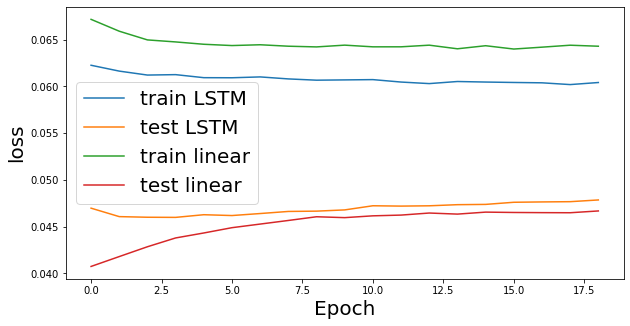

In [ ]:
plt.figure(figsize=(10,5), facecolor='w')
plt.plot(result_lstm.history['loss'][1:], label='train LSTM')
plt.plot(result_lstm.history['val_loss'][1:], label='test LSTM')
plt.plot(result_linear.history['loss'][1:], label='train linear')
plt.plot(result_linear.history['val_loss'][1:], label='test linear')
plt.legend(fontsize=20)
plt.xlabel('Epoch',  fontsize=20)
plt.ylabel('loss',  fontsize=20)
plt.show()

In [ ]:
# predictions_linear = linear.predict(feature_test)
predictions_lstm = model_lstm.predict(feature_test)

29/29 [==============================] - 1s 6ms/step


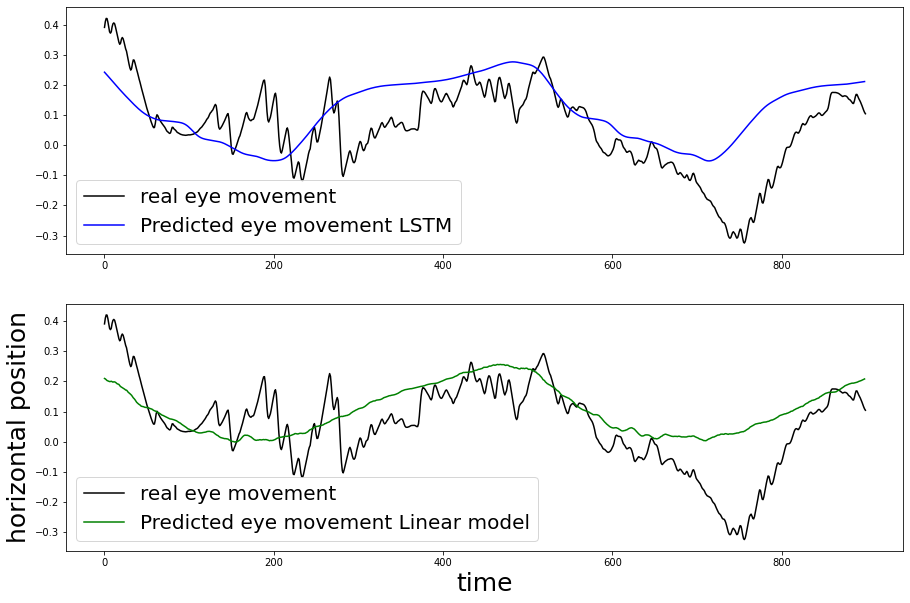

In [ ]:
y_test = y_test.reshape((y_test.shape[0],))
fig, ax = plt.subplots(ncols=1, nrows = 2, figsize=(15, 10))
fig.patch.set_facecolor('white')
n1 = 0
n2 = -1

ax[0].plot(y_test[n1+100:], color='black', label='real eye movement')
ax[0].plot(predictions_lstm[n1:n2], color='blue', label='Predicted eye movement LSTM')

ax[1].plot(y_test[n1+100:], color='black', label='real eye movement')
ax[1].plot(predictions_linear[n1:n2], color='green', label='Predicted eye movement Linear model')

plt.xlabel('time', fontsize=25)
plt.ylabel('horizontal position', fontsize=25)

ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)

plt.show()

In [ ]:
predictions_linear_train = linear.predict(feature_train2)
predictions_lstm_train = model_lstm.predict(feature_train2)

513/513 [==============================] - 4s 7ms/step


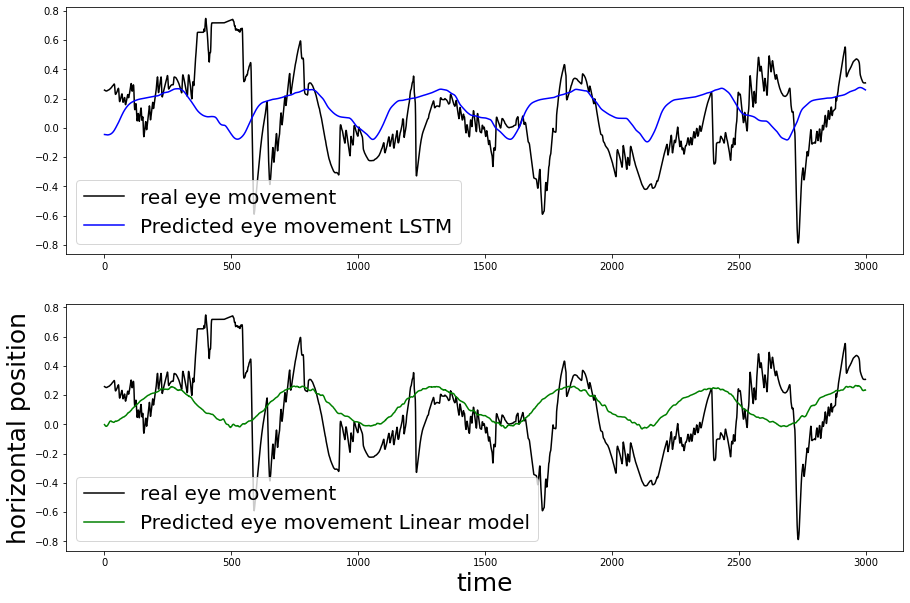

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows = 2, figsize=(15, 10))
fig.patch.set_facecolor('white')
n1 = 0
n2 = 3000

ax[0].plot(y_train2[n1:n2], color='black', label='real eye movement')
ax[0].plot(predictions_lstm_train[n1:n2], color='blue', label='Predicted eye movement LSTM')

ax[1].plot(y_train2[n1:n2], color='black', label='real eye movement')
ax[1].plot(predictions_linear_train[n1:n2], color='green', label='Predicted eye movement Linear model')

plt.xlabel('time', fontsize=25)
plt.ylabel('horizontal position', fontsize=25)

ax[0].legend(fontsize=20)
ax[1].legend(fontsize=20)

plt.show()